## Imports

In [237]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image

import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Directory, Image-Name & Image-Size Definitions

In [238]:
model_dir = '/home/drevital/cs_video_processor/models/jun22_a'
#im_dir = '/home/drevital/obstacles_classification_datasets/may22_b_1_5__1_0/eval/obstacle'
im_dir = '/home/drevital/obstacles_classification_datasets/test'
im_name = '1038_71961_0.51_.51_2022-02-01--03-13-41__unknown_.jpg'
im_height = 200
im_width = 600

## Load Trained Model

In [239]:
model = tf.keras.models.load_model(model_dir)

## Read Images

In [240]:
im_rgb = cv2.imread(os.path.join(im_dir, im_name))
im = cv2.cvtColor(im_rgb, cv2.COLOR_BGR2RGB)  

## Display Images

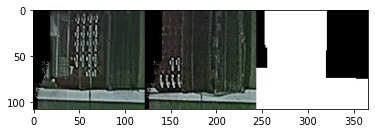

In [241]:
plt.imshow(im)
plt.show() 

## Prepare Images for Prediction

In [242]:
imrgb = cv2.resize(im,
                   dsize=(im_width, im_height),
                   interpolation=cv2.INTER_NEAREST)
imarr = np.array(imrgb, dtype='float32')
print(f'im(1): {imarr[100][:10]}')
print(f'im(2): {imarr[100][195:205]}')
print(f'im(3): {imarr[100][395:405]}')
h = imarr.shape[0]
w = imarr.shape[1]

im1 = imarr[:, :w//3]
im2 = imarr[:, w//3:(w*2)//3] 
im3 = imarr[:, (w*2)//3:] 
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
im3 = cv2.cvtColor(im3, cv2.COLOR_RGB2GRAY)

# Translate original rabge (0-255) to trained range (0.0-1.0)
im1 /= 255.0
im2 /= 255.0
im3 /= 255.0

# Normalize Images
#norm = np.zeros((h, w, 3))
#im1 = cv2.normalize(im1, norm, 0, 1, cv2.NORM_MINMAX)
#im2 = cv2.normalize(im2, norm, 0, 1, cv2.NORM_MINMAX)
#im3 = cv2.normalize(im2, norm, 0, 1, cv2.NORM_MINMAX)

orig_im1 = im1
orig_im2 = im2
orig_im3 = im3

# Reshape to match model's input shape
im1 = im1.reshape(1, im1.shape[0], im1.shape[1], 3)
im2 = im2.reshape(1, im2.shape[0], im2.shape[1], 3)
im3 = im3.reshape(1, im3.shape[0], im3.shape[1], 1)

im(1): [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
im(2): [[74. 93. 73.]
 [63. 82. 62.]
 [63. 81. 59.]
 [63. 81. 59.]
 [72. 85. 68.]
 [ 0.  4.  0.]
 [ 0.  4.  0.]
 [ 0.  1.  3.]
 [ 0.  1.  3.]
 [ 2.  0.  1.]]
im(3): [[62. 81. 59.]
 [62. 79. 60.]
 [64. 78. 61.]
 [64. 78. 61.]
 [76. 86. 75.]
 [ 0.  3.  0.]
 [ 0.  3.  0.]
 [ 0.  4.  0.]
 [ 0.  4.  0.]
 [ 1.  1.  1.]]


## Display image components

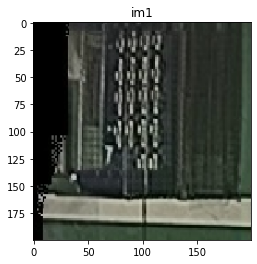

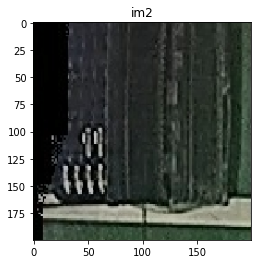

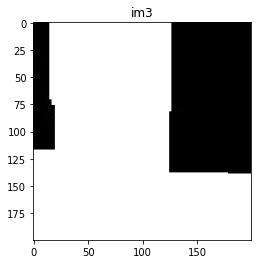

In [243]:
plt.imshow(orig_im1)
plt.title('im1')
plt.show() 

plt.imshow(orig_im2)
plt.title('im2')
plt.show() 

plt.imshow(orig_im3, cmap='gray', vmin=0, vmax=1)
plt.title('im3')
plt.show() 

## Predict 

In [244]:
prediction = model.predict([im1, im2, im3])

1/1 [==============================] - 0s 316ms/step


In [245]:
prediction

array([[0.13461235]], dtype=float32)